In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,NaN,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2
float64		column 2	4
float64		column 3	3
float64		column 4	1
float64		column 5	1
float64		column 6	2
float64		column 7	1
float64		column 8	1
float64		column 9	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,212.000000,210.000000,211.000000,213.000000,213.000000,212.000000,213.000000,213.000000,211.000000
mean,1.518394,13.403095,2.706445,1.447418,72.650516,0.494717,8.956995,0.175869,0.055450
std,0.003028,0.820174,1.427760,0.499089,0.776346,0.654825,1.426506,0.498245,0.095813
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516528,12.907500,2.195000,1.190000,72.280000,0.120000,8.240000,0.000000,0.000000
50%,1.517680,13.295000,3.480000,1.360000,72.790000,0.550000,8.600000,0.000000,0.000000
75%,1.519165,13.805000,3.605000,1.630000,73.090000,0.610000,9.180000,0.000000,0.095000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

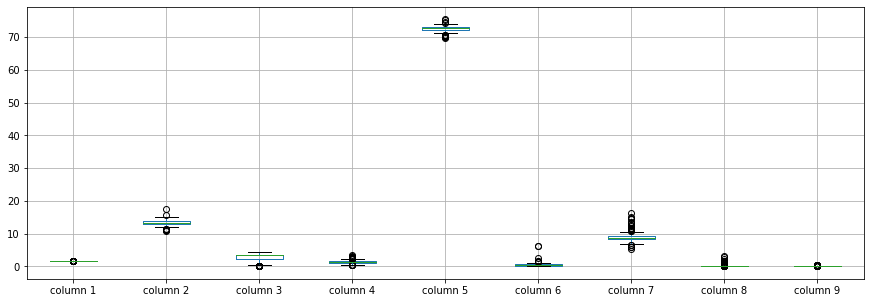

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518394
column 2    13.403095
column 3     2.706445
column 4     1.447418
column 5    72.650516
column 6     0.494717
column 7     8.956995
column 8     0.175869
column 9     0.055450
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.195013,-0.131551,-0.405604,-0.534540,-0.302172,0.810580,-0.004207,0.104351
column 2,-0.195013,1.000000,-0.271882,0.156146,-0.052607,-0.276101,-0.282334,0.327854,-0.206060
column 3,-0.131551,-0.271882,1.000000,-0.475445,-0.153605,-0.002938,-0.445897,-0.486884,0.090918
column 4,-0.405604,0.156146,-0.475445,1.000000,-0.013842,0.323263,-0.261610,0.478592,-0.071475
column 5,-0.534540,-0.052607,-0.153605,-0.013842,1.000000,-0.193479,-0.208930,-0.100891,-0.074667
column 6,-0.302172,-0.276101,-0.002938,0.323263,-0.193479,1.000000,-0.319387,-0.041222,-0.011491
column 7,0.810580,-0.282334,-0.445897,-0.261610,-0.208930,-0.319387,1.000000,-0.114001,0.079712
column 8,-0.004207,0.327854,-0.486884,0.478592,-0.100891,-0.041222,-0.114001,1.000000,-0.055408
column 9,0.104351,-0.206060,0.090918,-0.071475,-0.074667,-0.011491,0.079712,-0.055408,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+71,9+71+71,9+71+71+71,9+71+71+71+71,9+71+71+71+71+71,9+71+71+71+71,9+71+71+71,9+71+71,9+71,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 101.77245154747597
Epoch: 1 , loss: 102.11735123854417
Epoch: 2 , loss: 101.71710263765775
Epoch: 3 , loss: 101.82117755596454
Epoch: 4 , loss: 101.64281228872446
Epoch: 5 , loss: 101.69576263427734
Epoch: 6 , loss: 101.65531099759616
Epoch: 7 , loss: 101.61899038461539
Epoch: 8 , loss: 101.64119779146634
Epoch: 9 , loss: 101.68468886155348
Epoch: 10 , loss: 101.59590501051683
Epoch: 11 , loss: 101.55829796424278
Epoch: 12 , loss: 101.54368767371544
Epoch: 13 , loss: 101.50956197885367
Epoch: 14 , loss: 101.42179048978366
Epoch: 15 , loss: 101.3657449575571
Epoch: 16 , loss: 101.14358285757211
Epoch: 17 , loss: 100.67483813946063
Epoch: 18 , loss: 100.05179243821364
Epoch: 19 , loss: 98.98031909649188
Epoch: 20 , loss: 98.56283862774188
Epoch: 21 , loss: 97.56107682448167
Epoch: 22 , loss: 97.21494410588191
Epoch: 23 , loss: 96.11092904897836
Epoch: 24 , loss: 94.8828125
Epoch: 25 , loss: 93.67527536245

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,1.66175,0.0,0.0,0.0,0.0,0.0,0.0
211,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(53.253871332386446, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.04883722862371009

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49000,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60000,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55000,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69000,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62000,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00000,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,1.66175,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00000,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00000,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_NW_1(imp).xlsx", index=False, header=False)